In [1]:
import gymnasium as gym
import numpy as np
from src.dqn import QNetwork
from src.dqn import run_dqn
import torch
import matplotlib.pyplot as plt

## Train the Agent

In [2]:
env = gym.make('LunarLander-v2', render_mode="human")

Episode 100	Average Score: -163.90
Episode 200	Average Score: -92.110
Episode 300	Average Score: -45.36
Episode 400	Average Score: 27.775
Episode 500	Average Score: 129.83
Episode 600	Average Score: 178.85
Episode 673	Average Score: 200.11
Environment solved in 573 episodes!	Average Score: 200.11


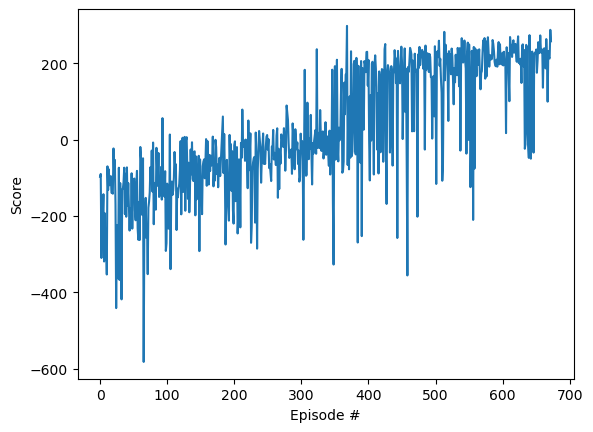

In [3]:
scores = run_dqn()

# Plot the scores
plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

env.close()

# Load Model

In [6]:
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

model = QNetwork(state_size, action_size)
model.load_state_dict(torch.load('data/checkpoints/checkpoint_final.pth'))
model.eval()

QNetwork(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

In [7]:
def select_action(state):
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Convert state to tensor
    with torch.no_grad():
        action_values = model(state)
    return np.argmax(action_values.numpy())

num_episodes = 10

for episode in range(num_episodes):
    state = env.reset()[0]  # Get the initial state
    done = False
    total_reward = 0
    while not done:
        env.render()  # Render the environment
        action = select_action(state)  # Choose action
        next_state, reward, done, _, _ = env.step(action)  # Take action
        total_reward += reward 
        state = next_state  
    print(f"Episode {episode + 1}: Total Reward: {total_reward}")

env.close()

Episode 1: Total Reward: 258.9205209662599
Episode 2: Total Reward: 247.69145079873527
Episode 3: Total Reward: 137.22575510011575
Episode 4: Total Reward: 240.8786863143748
Episode 5: Total Reward: 241.24562334741188
Episode 6: Total Reward: 198.96113214243607
Episode 7: Total Reward: 229.51660870367806
Episode 8: Total Reward: -1526.0632205352342
Episode 9: Total Reward: 233.0843644446425
Episode 10: Total Reward: 230.95380152065488
